<h1>Instagram Reach Analysis and Prediction</h1>

**1. Import the Necessary libraries**
- numpy
- pandas
- matplotlib.pyplot
- seaborn as sns
- plotly.express as px
- train_test_split
- from sklearn.linear_model import PassiveAggressiveRegression
- from wordcloud import wordcloud, STOPWORDS, ImageColorGenerator

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import statsmodels.api
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
# read the file instagram data.csv to a pandas dataframe with Encoding='latin1'
data = pd.read_csv("Instagram data.csv", encoding='latin1')

In [4]:
data.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [5]:
# check if there are any null values 
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


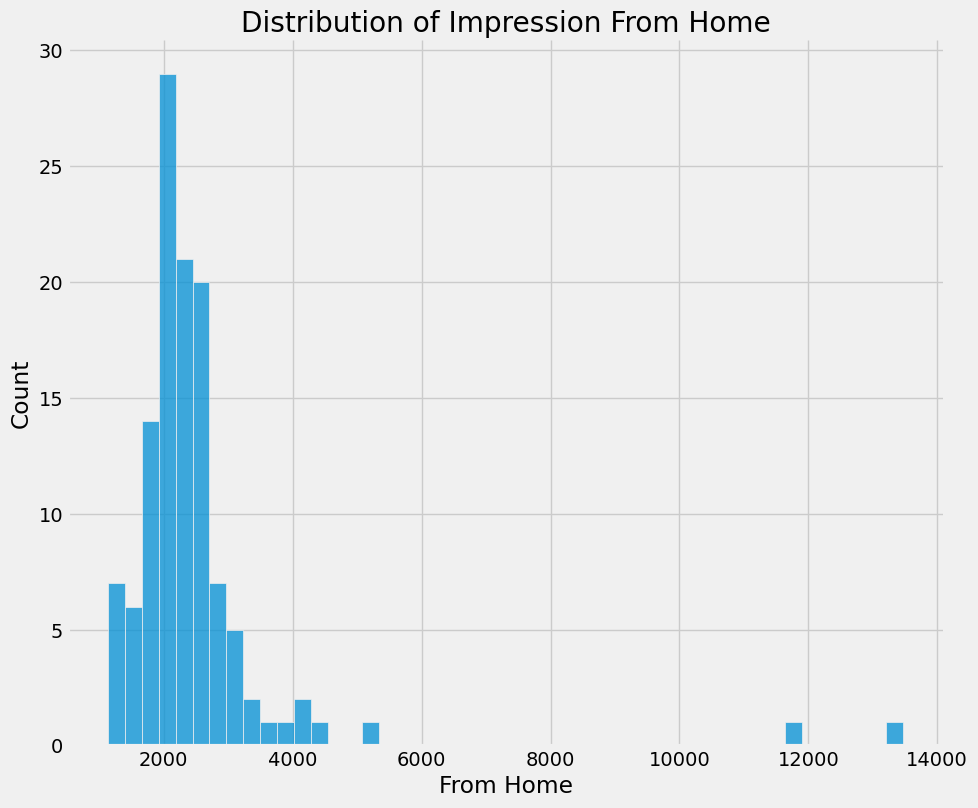

In [7]:
plt.style.use('fivethirtyeight')
sns.displot(data['From Home'], height=8, aspect=1.25)
plt.title("Distribution of Impression From Home")
plt.show()

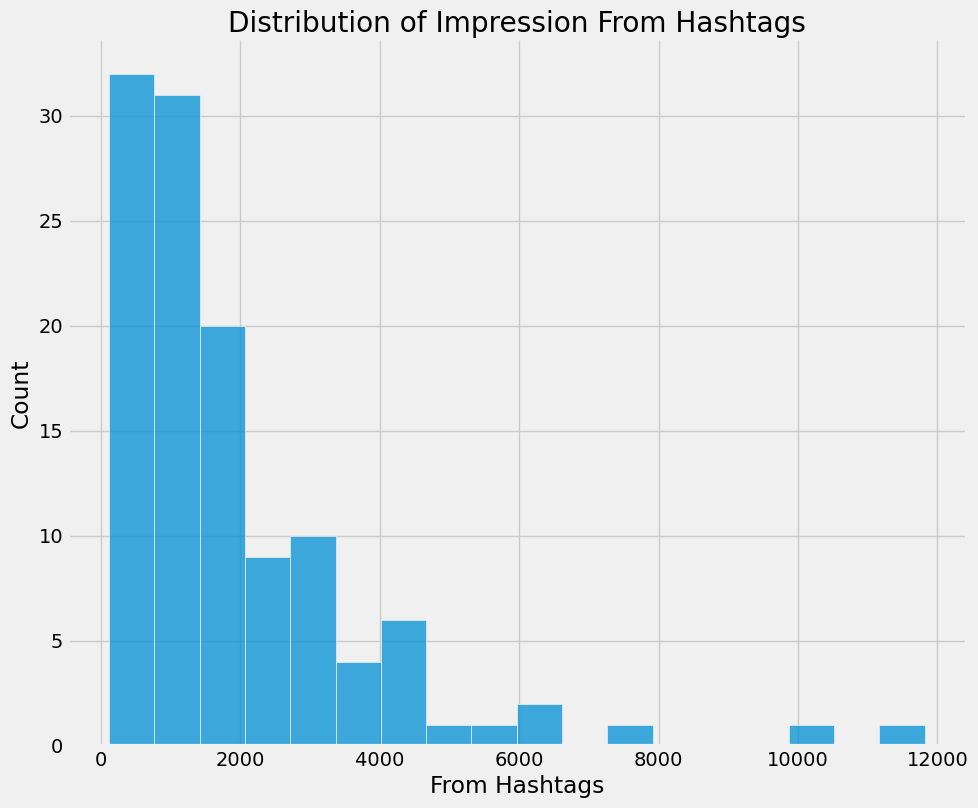

In [8]:
plt.style.use('fivethirtyeight')
sns.displot(data['From Hashtags'], height=8, aspect=1.25)
plt.title("Distribution of Impression From Hashtags")
plt.show()

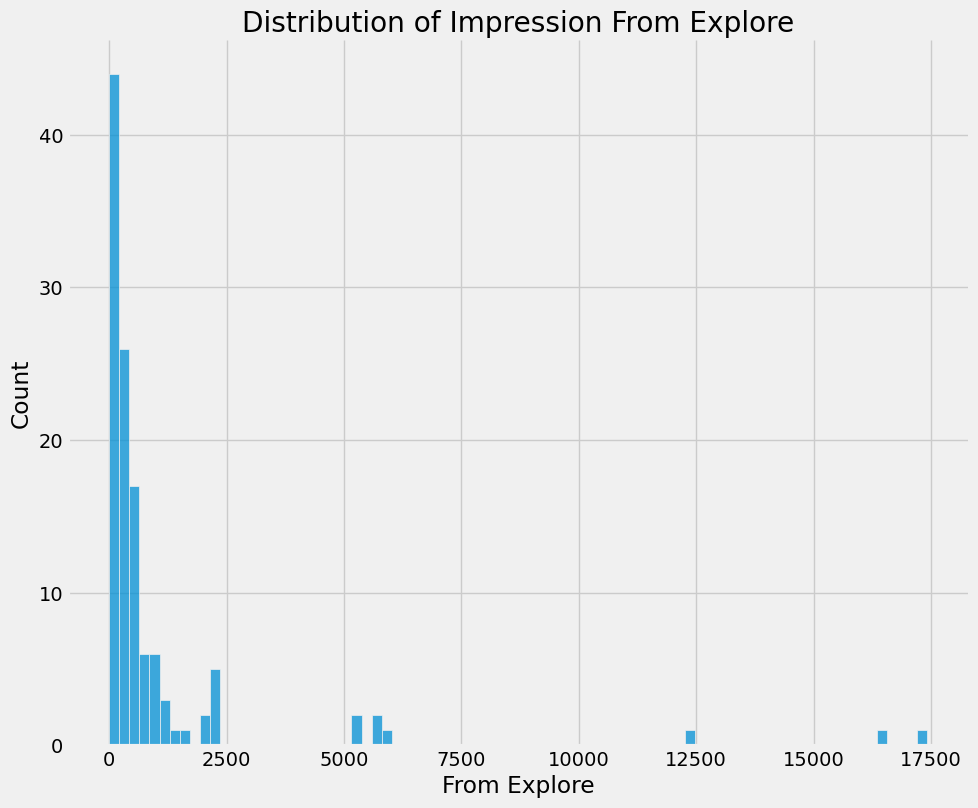

In [9]:
plt.style.use('fivethirtyeight')
sns.displot(data['From Explore'], height=8, aspect=1.25)
plt.title("Distribution of Impression From Explore")
plt.show()

In [10]:
import plotly.express as px

home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ["Home", "Hashtags", "Explore", "Other"]
values = [home, hashtags, explore, other]

# Remove `data` from px.pie
fig = px.pie(values=values, names=labels, hole=0.5,title= "Impression on Instagram Post from various sources", color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()


From this we find that home is the best Impression source

Now we are gonna find the most used word on the Instagram post

In [11]:
data["Caption"].head()

0    Here are some of the most important data visua...
1    Here are some of the best data science project...
2    Learn how to train a machine learning model an...
3    Heres how you can write a Python program to d...
4    Plotting annotations while visualizing your da...
Name: Caption, dtype: object

Showing most used words in Caption column using wordcloud

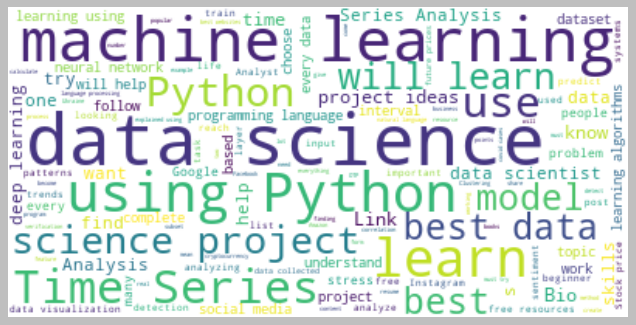

In [12]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use("classic")
plt.figure(figsize=(10,8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

Showing most used words in Hashtags column using wordcloud

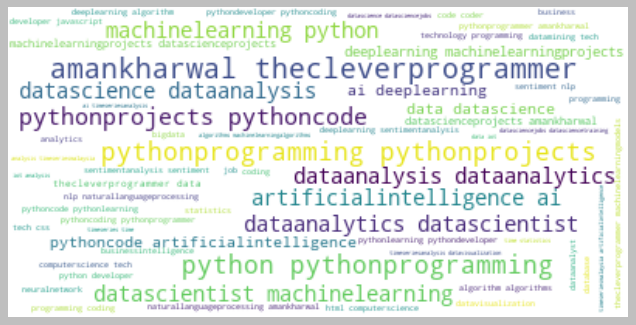

In [13]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use("classic")
plt.figure(figsize=(10,8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [20]:
figure = px.scatter(data_frame=data, x="Impressions",
                    y="Likes", size="Impressions", trendline="ols",
                    title="Relationship between Likes and Impressions")
figure.show()


In [21]:
figure = px.scatter(data_frame=data, x="Impressions",
                    y="Comments", size="Impressions", trendline="ols",
                    title="Relationship between Comments and Impressions")
figure.show()


In [22]:
figure = px.scatter(data_frame=data, x="Impressions",
                    y="Shares", size="Impressions", trendline="ols",
                    title="Relationship between Shares and Impressions")
figure.show()


In [24]:
figure = px.scatter(data_frame=data, x="Impressions",
                    y="Saves", size="Impressions", trendline="ols",
                    title="Relationship between Saves and Impressions")
figure.show()


In [25]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


In [26]:
figure = px.scatter(data_frame=data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols",
                    title="Relationship between Profile Visits and Followers Gained")
figure.show()


<h3>Creating Instagram Prediction model using PassiveAggressiveRegressor</h3>

In [36]:
X = np.array(data[["Likes",'Saves','Comments','Shares',
                   "Profile Visits","Follows"]])
y = np.array(data["Impressions"])

In [37]:
X.shape

(119, 6)

In [38]:
y.shape

(119,)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [113]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8420108509816469

In [114]:
y_pred = model.predict(X_test)

In [115]:
print("Length of y_test:", len(y_test))
print("Length of y_pred:", len(y_pred))
print("y_test:", y_test)
print("y_pred:", y_pred)

Length of y_test: 24
Length of y_pred: 24
y_test: [ 4978  7407  2518  4298  5394 32695  3601  2218 10386  5542  6168 11149
  3234  2766  4289  3854  2826  3920  3924  5563  7571 16062  5394  6432]
y_pred: [ 4764.44  7006.26  3574.18  4984.26  4809.46 22095.01  3886.66  2669.1
 13758.11  4425.93  6087.39 11609.38  4339.92  3115.26  5456.92  4258.53
  2895.4   4225.85  3978.4   5448.31 10663.8  14203.55  4809.46  4615.39]


In [121]:
mae = mean_absolute_error(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred) * 100
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2,"%")

Mean Absolute Error (MAE): 1259.64875
Mean Squared Error (MSE): 6135942.799920835
R² Score: 84.20108509816468 %


In [122]:
feature = np.array([[282.0,233.0,4.0,9.0,165.0,54.0]])
y_pred_feature = model.predict(feature)
print(y_pred_feature)

[11405.76]
